# Project Overview: Building Energy Efficiency Prediction
This project explores the Energy Efficiency dataset to predict two key indicators of building performance:

*   **Heating Load (HL)**
*   **Cooling Load (CL)**

The goal was to build regression models that can estimate these loads based on architectural features such as surface area, wall area, orientation, and glazing area.

The process included:

* Data preprocessing and feature     engineering

* Exploratory data analysis (EDA)

* Building and evaluating different machine learning models (Linear Regression and Gradient Boosting Regressor)

* Feature importance analysis and model interpretation

* Final model selection and performance comparison


The best models achieved:

🔥 Heating Load: R² = 1.00, MSE = 0.28

❄️ Cooling Load: R² = 0.99, MSE = 1.36

# Loading libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ENB2012_data.csv")

In [4]:
df.columns = [
    'Relative Compactness',
    'Surface Area',
    'Wall Area',
    'Roof Area',
    'Overall Height',
    'Orientation',
    'Glazing Area',
    'Glazing Area Distribution',
    'Heating Load',
    'Cooling Load'
]

# Exploratory Data Analysis

In [5]:
df.shape

(768, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


array([[<Axes: title={'center': 'Relative Compactness'}>,
        <Axes: title={'center': 'Surface Area'}>,
        <Axes: title={'center': 'Wall Area'}>],
       [<Axes: title={'center': 'Roof Area'}>,
        <Axes: title={'center': 'Overall Height'}>,
        <Axes: title={'center': 'Orientation'}>],
       [<Axes: title={'center': 'Glazing Area'}>,
        <Axes: title={'center': 'Glazing Area Distribution'}>,
        <Axes: title={'center': 'Heating Load'}>],
       [<Axes: title={'center': 'Cooling Load'}>, <Axes: >, <Axes: >]],
      dtype=object)

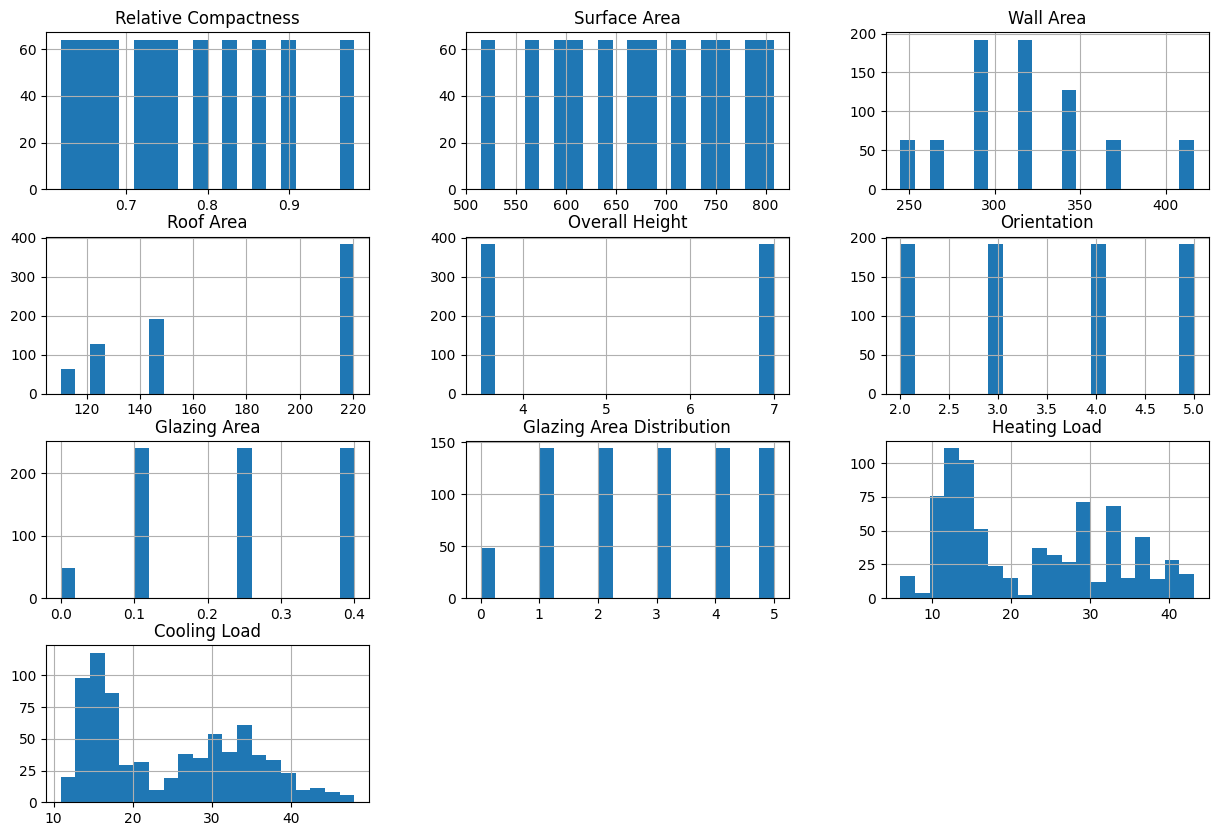

In [8]:
df.hist(figsize=(15,10), bins=20)

In [9]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

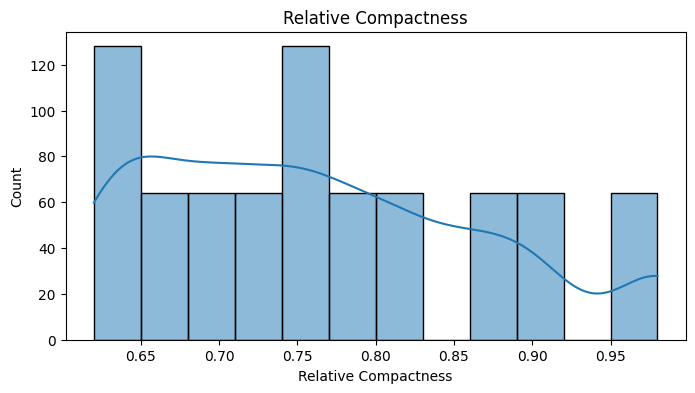

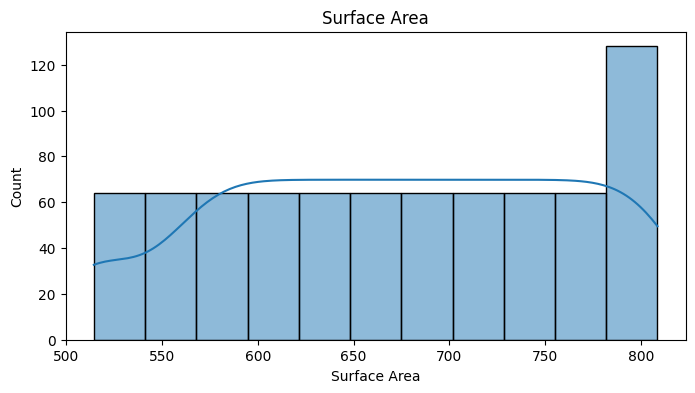

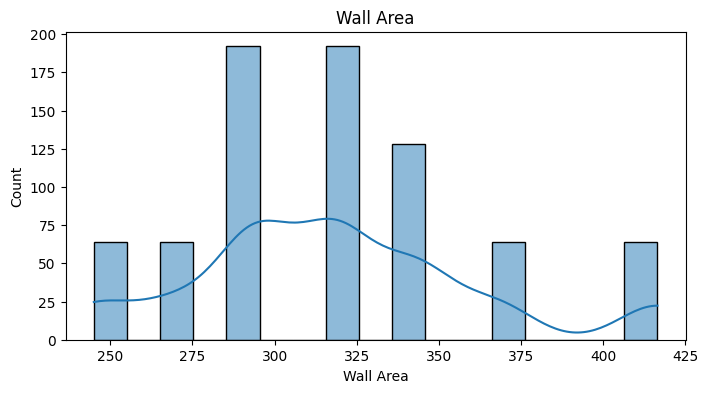

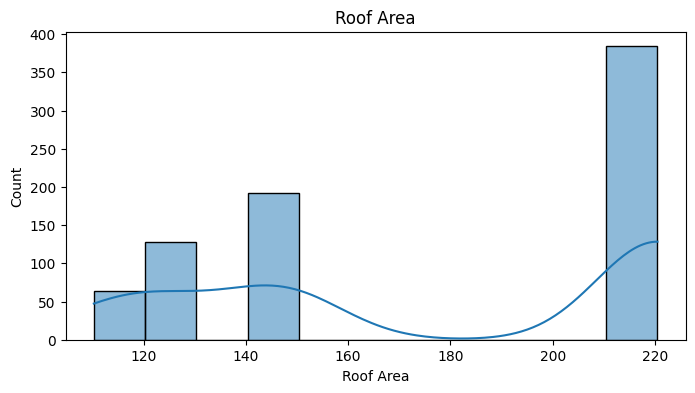

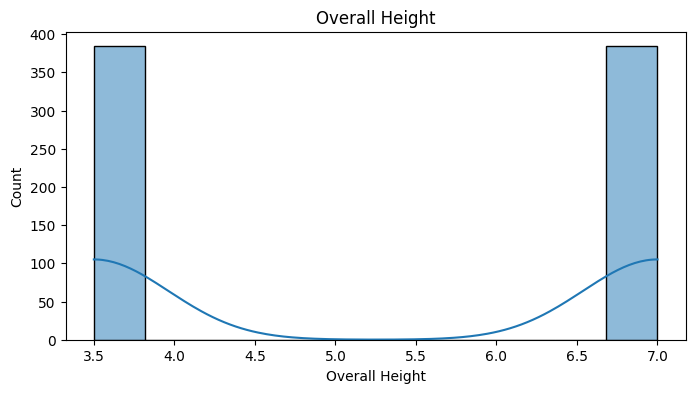

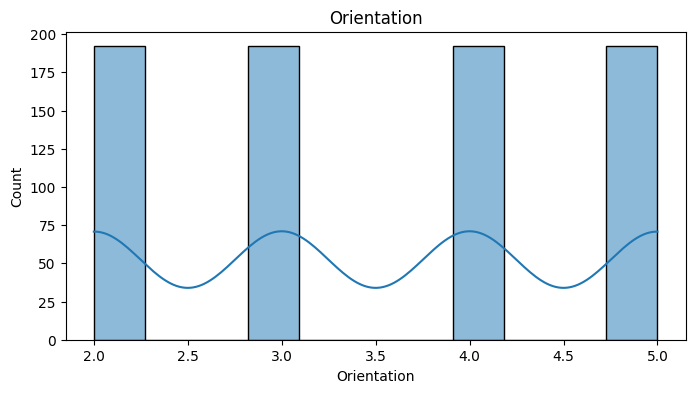

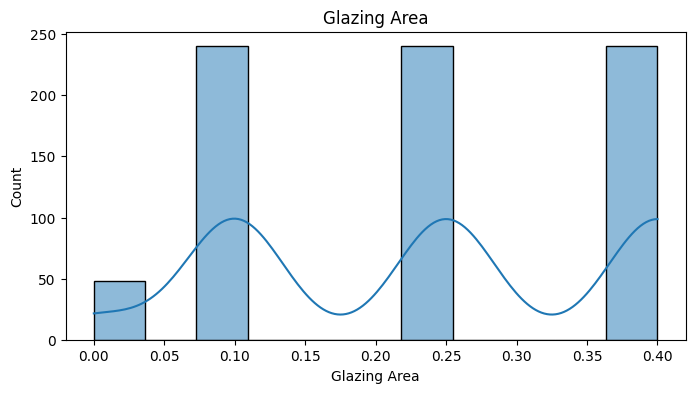

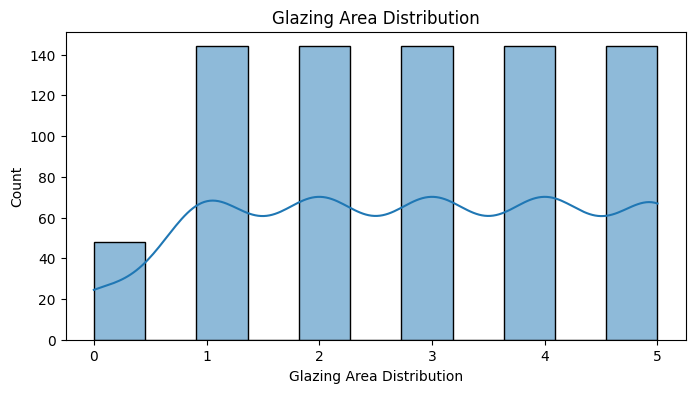

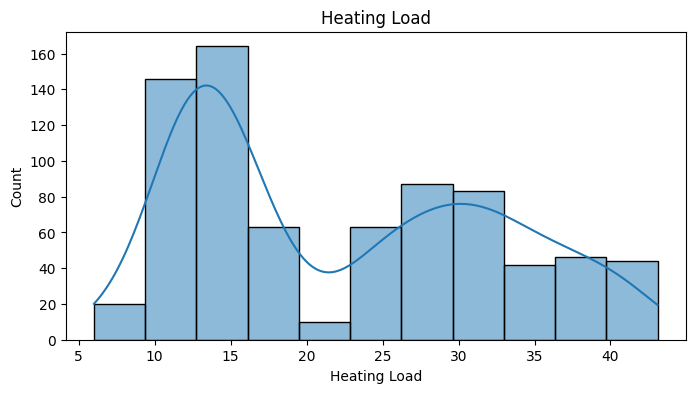

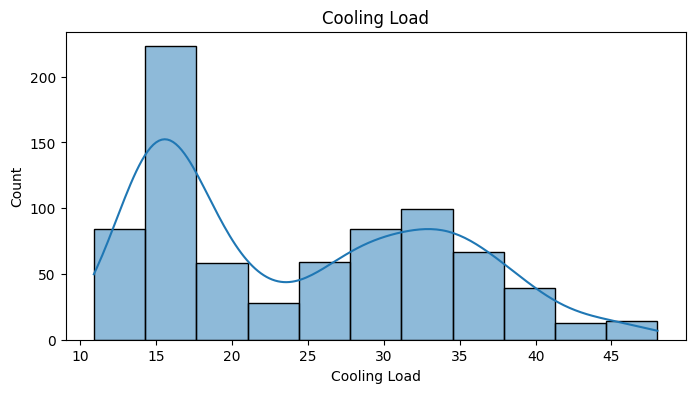

In [10]:
for i in df.columns:
  plt.figure(figsize=(8,4))
  sns.histplot(df[i], kde=True)
  plt.title(i)
  plt.show

In [11]:
df.corr().round(2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
Surface Area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
Wall Area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
Roof Area,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
Overall Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
Orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
Glazing Area,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
Glazing Area Distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Heating Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


In [12]:
df.Orientation.value_counts()

,count
Orientation,
2,192
3,192
4,192
5,192


In [13]:
df['Overall Height'].value_counts()

,count
Overall Height,
7.0,384
3.5,384


In [14]:
df['Glazing Area'].value_counts()

,count
Glazing Area,
0.10,240
0.25,240
0.40,240
0.00,48


In [15]:
df['Glazing Area Distribution'].value_counts()

,count
Glazing Area Distribution,
1,144
2,144
4,144
3,144
5,144
0,48


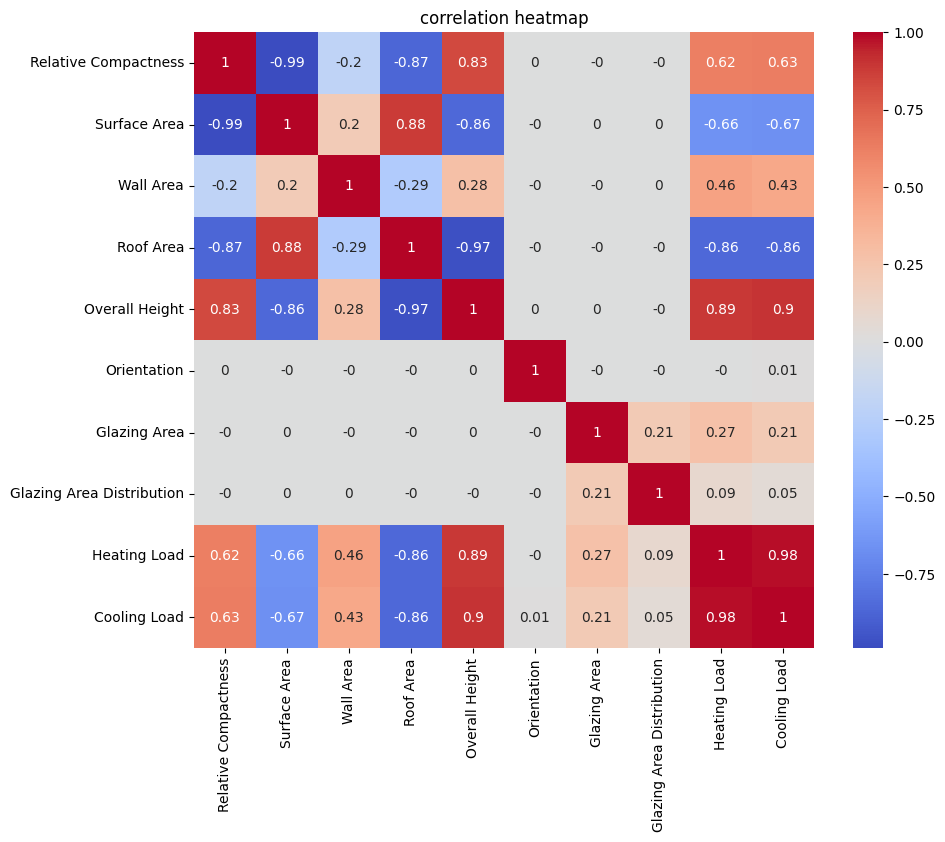

In [16]:
corr = df.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

# Data preprocessing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [19]:
X_train = train_set.drop(["Heating Load", "Cooling Load"], axis=1)
X_test = test_set.drop(["Heating Load", "Cooling Load"], axis=1)

# Target variable: Heating Load
y_train = train_set["Heating Load"]
y_test = test_set["Heating Load"]

# Target variable: 'Cooling Load'
y_train_c = train_set["Cooling Load"]
y_test_c = test_set["Cooling Load"]

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
cat_feature = ['Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Overall Height']
numerical_feature_sc = ['Surface Area', 'Wall Area', 'Roof Area']
numerical_feature_mm = ['Relative Compactness']

In [22]:
all_transformations = ColumnTransformer([
    ("ohe", OneHotEncoder(), cat_feature),
    ("sc", StandardScaler(), numerical_feature_sc),
    ("mms",MinMaxScaler(), numerical_feature_mm)
])

# Modeling

**Linear Regression Model**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
lr_pipeline = make_pipeline(all_transformations,
                            LinearRegression())

In [26]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Orientation',
                                                   'Glazing Area',
                                                   'Glazing Area Distribution',
                                                   'Overall Height']),
                                                 ('sc', StandardScaler(),
                                                  ['Surface Area', 'Wall Area',
                                                   'Roof Area']),
                                                 ('mms', MinMaxScaler(),
                                                  ['Relative Compactness'])])),
                ('linearregression', LinearRegression())])

In [27]:
# Train the model to predict Heating Load
y_predict = lr_pipeline.predict(X_train)

In [28]:
# Evaluate model performance on the train set using MSE and R² score
mean_squared_error(y_train, y_predict)

7.653984732628807

In [29]:
r2_score(y_train, y_predict)

0.9241608399976681

In [30]:
y_pred_test = lr_pipeline.predict(X_test)

# Evaluate model performance on the test set using MSE and R² score
lr_mse_h = mean_squared_error(y_test, y_pred_test)
lr_r2_h = r2_score(y_test, y_pred_test)
print(f'MSE: {lr_mse_h:.2f}')
print(f'R2: {lr_r2_h:.2f}')

MSE: 8.27
R2: 0.92


In [31]:
# Train the model to predict Cooling Load
lr_pipeline.fit(X_train, y_train_c)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Orientation',
                                                   'Glazing Area',
                                                   'Glazing Area Distribution',
                                                   'Overall Height']),
                                                 ('sc', StandardScaler(),
                                                  ['Surface Area', 'Wall Area',
                                                   'Roof Area']),
                                                 ('mms', MinMaxScaler(),
                                                  ['Relative Compactness'])])),
                ('linearregression', LinearRegression())])

In [32]:
y_pred_c = lr_pipeline.predict(X_train)

In [33]:
# Evaluate model performance on the train set using MSE and R² score
mean_squared_error(y_train_c ,y_pred_c)

10.016298945116018

In [34]:
r2_score(y_train_c ,y_pred_c)

0.8882845576686141

In [35]:
y_pred_c_test = lr_pipeline.predict(X_test)

# Evaluate model performance on the test set using MSE and R² score
lr_mse_c = mean_squared_error(y_test_c ,y_pred_c_test)
lr_r2_c = r2_score(y_test_c ,y_pred_c_test)
print(f'MSE: {lr_mse_c:.2f}')
print(f'R2: {lr_r2_c:.2f}')

MSE: 9.76
R2: 0.89


# **random forest regressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_pipeline = make_pipeline(all_transformations,
                            RandomForestRegressor(n_estimators=100, random_state=42))

In [38]:
# Train the model to predict Heating Load
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Orientation',
                                                   'Glazing Area',
                                                   'Glazing Area Distribution',
                                                   'Overall Height']),
                                                 ('sc', StandardScaler(),
                                                  ['Surface Area', 'Wall Area',
                                                   'Roof Area']),
                                                 ('mms', MinMaxScaler(),
                                                  ['Relative Compactness'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [39]:
y_pred_h_rf = rf_pipeline.predict(X_train)

In [40]:
# Evaluate model performance on the train set using MSE and R² score
mean_squared_error(y_train, y_pred_h_rf)

0.03482778703583071

In [41]:
r2_score(y_train, y_pred_h_rf)

0.9996549104543836

In [42]:
y_pred_h_rf_test = rf_pipeline.predict(X_test)

# Evaluate model performance on the test set using MSE and R² score
rf_mse_h = mean_squared_error(y_test, y_pred_h_rf_test)
rf_r2_h = r2_score(y_test, y_pred_h_rf_test)
print(f'MSE: {rf_mse_h:.2f}')
print(f'R2: {rf_r2_h:.2f}')

MSE: 0.28
R2: 1.00


In [43]:
# Train the model to predict Cooling Load
rf_pipeline.fit(X_train, y_train_c)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Orientation',
                                                   'Glazing Area',
                                                   'Glazing Area Distribution',
                                                   'Overall Height']),
                                                 ('sc', StandardScaler(),
                                                  ['Surface Area', 'Wall Area',
                                                   'Roof Area']),
                                                 ('mms', MinMaxScaler(),
                                                  ['Relative Compactness'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [44]:
y_pred_c_rf = rf_pipeline.predict(X_train)

In [45]:
# Evaluate model performance on the train set using MSE and R² score
mean_squared_error(y_train, y_pred_c_rf)

8.207061506368074

In [46]:
r2_score(y_train, y_pred_c_rf)

0.9186807039113789

In [47]:
y_pred_c_rf_test = rf_pipeline.predict(X_test)

# Evaluate model performance on the test set using MSE and R² score
rf_mse_c = mean_squared_error(y_test, y_pred_c_rf_test)
rf_r2_c = r2_score(y_test, y_pred_c_rf_test)
print(f'MSE: {rf_mse_c:.2f}')
print(f'R2: {rf_r2_c:.2f}')

MSE: 7.73
R2: 0.93


**Gradient Boosting Regressor**

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
gbr_pipeline = make_pipeline(all_transformations,
                            GradientBoostingRegressor())

In [50]:
param_grid = {'gradientboostingregressor__n_estimators' : [100,200,300],
              'gradientboostingregressor__learning_rate' : [0.1,0.5,0.01],
              'gradientboostingregressor__max_depth' : [3,4,5],
              'gradientboostingregressor__subsample' : [1.0,0.8]}

In [51]:
gs = GridSearchCV(gbr_pipeline,
                  param_grid,
                  scoring="neg_mean_squared_error",
                  cv=3)

In [52]:
gs.fit(X_train, y_train_c)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['Orientation',
                                                                          'Glazing '
                                                                          'Area',
                                                                          'Glazing '
                                                                          'Area '
                                                                          'Distribution',
                                                                          'Overall '
                                                                          'Height']),
                                                                        ('sc',
                                                                         StandardScaler(),
                                                                         ['Surface '
                                                                          'Area',
                                                                          'Wall '
                                                                          'Area',
                                                                          'Roof '
                                                                          'Area']),
                                                                        ('mms',
                                                                         MinMaxScaler(),
                                                                         ['Relative '
                                                                          'Compactness'])])),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             param_grid={'gradientboostingregressor__learning_rate': [0.1, 0.5,
                                                                      0.01],
                         'gradientboostingregressor__max_depth': [3, 4, 5],
                         'gradientboostingregressor__n_estimators': [100, 200,
                                                                     300],
                         'gradientboostingregressor__subsample': [1.0, 0.8]},
             scoring='neg_mean_squared_error')

In [53]:
gs.best_params_

{'gradientboostingregressor__learning_rate': 0.5,
 'gradientboostingregressor__max_depth': 4,
 'gradientboostingregressor__n_estimators': 300,
 'gradientboostingregressor__subsample': 0.8}

In [54]:
gbr_model = gs.best_estimator_

In [55]:
gbr_predict = gbr_model.predict(X_train)

In [56]:
# Evaluate model performance on the train set using MSE and R² score
mean_squared_error(y_train_c, gbr_predict)

0.010682122708895292

In [57]:
r2_score(y_train_c, gbr_predict)

0.9998808583819232

In [58]:
gbr_predict_test = gbr_model.predict(X_test)

# Evaluate model performance on the test set using MSE and R² score
gbr_mse_c = mean_squared_error(y_test_c, gbr_predict_test)
gbr_r2_c = r2_score(y_test_c, gbr_predict_test)
print(f'MSE: {gbr_mse_c:.2f}')
print(f'R2: {gbr_r2_c:.2f}')

MSE: 1.36
R2: 0.99


# feature importances

In [59]:
best_pipeline = gs.best_estimator_

In [60]:
gbr_model_out = best_pipeline.named_steps["gradientboostingregressor"]

In [61]:
feature_names = best_pipeline.named_steps["columntransformer"].get_feature_names_out()

In [62]:
feature_importances = gbr_model_out.feature_importances_

In [63]:
sorted(zip(feature_importances.round(3),feature_names),reverse = True)

[(np.float64(0.608), 'sc__Surface Area'),
 (np.float64(0.182), 'ohe__Overall Height_7.0'),
 (np.float64(0.083), 'sc__Wall Area'),
 (np.float64(0.038), 'mms__Relative Compactness'),
 (np.float64(0.024), 'ohe__Glazing Area_0.4'),
 (np.float64(0.015), 'sc__Roof Area'),
 (np.float64(0.01), 'ohe__Glazing Area Distribution_0'),
 (np.float64(0.007), 'ohe__Glazing Area_0.25'),
 (np.float64(0.005), 'ohe__Orientation_2'),
 (np.float64(0.005), 'ohe__Glazing Area_0.1'),
 (np.float64(0.004), 'ohe__Orientation_5'),
 (np.float64(0.004), 'ohe__Glazing Area Distribution_5'),
 (np.float64(0.004), 'ohe__Glazing Area Distribution_4'),
 (np.float64(0.003), 'ohe__Glazing Area_0.0'),
 (np.float64(0.003), 'ohe__Glazing Area Distribution_3'),
 (np.float64(0.002), 'ohe__Orientation_4'),
 (np.float64(0.002), 'ohe__Orientation_3'),
 (np.float64(0.001), 'ohe__Glazing Area Distribution_2'),
 (np.float64(0.001), 'ohe__Glazing Area Distribution_1'),
 (np.float64(0.0), 'ohe__Overall Height_3.5')]

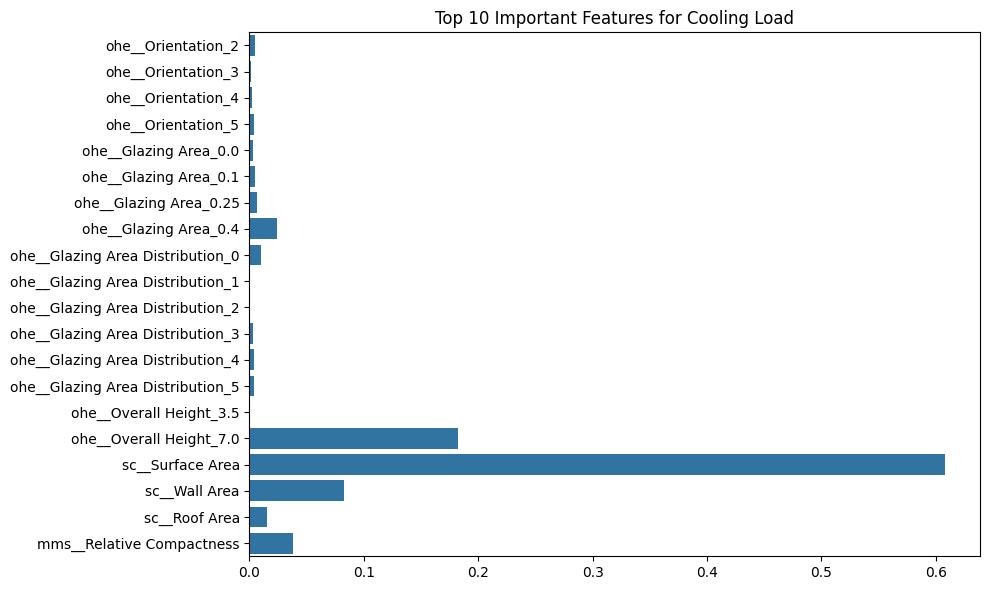

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Top 10 Important Features for Cooling Load')
plt.tight_layout()
plt.show()

# Feature Engineering

In addition to building models using all features, I also created a simplified version of the model using only the most important features identified through feature importance analysis. This approach reduced the complexity of the model while maintaining high performance. It helps in better interpretability and potentially faster inference.

In [65]:
selected_features = [
    'Overall Height',
    'Surface Area',
    'Wall Area',
    'Relative Compactness',
    'Glazing Area',
    'Roof Area'
]

In [66]:
X_train_simple = X_train[selected_features]
X_test_simple = X_test[selected_features]

In [67]:
cat_feature_simple = ['Glazing Area', 'Overall Height']
numerical_feature_sc = ['Surface Area', 'Wall Area', 'Roof Area']
numerical_feature_mm = ['Relative Compactness']

In [68]:
all_transformations_simple = ColumnTransformer([
    ("ohe", OneHotEncoder(), cat_feature_simple),
    ("sc", StandardScaler(), numerical_feature_sc),
    ("mms",MinMaxScaler(), numerical_feature_mm)
])

In [69]:
gbr_pipeline_simple = make_pipeline(all_transformations_simple,
                            GradientBoostingRegressor(random_state=42))

In [70]:
gbr_pipeline_simple.fit(X_train_simple, y_train_c)
y_pred_simple = gbr_pipeline_simple.predict(X_test_simple)

# Evaluate model performance on the test set using MSE and R² score
gbr_mse_c_simple = mean_squared_error(y_test_c,y_pred_simple)
gbr_r2_c_simple = r2_score(y_test_c,y_pred_simple)
print(f'MSE: {gbr_mse_c_simple:.2f}')
print(f'R2: {gbr_r2_c_simple:.2f}')

MSE: 3.05
R2: 0.97


As part of feature engineering, I created two new features — the wall-to-roof area ratio and the product of wall and roof area — to explore whether they could improve model performance. The goal was to extract potentially meaningful interactions between existing numerical features. However, the performance improvement was marginal, so I decided to proceed with the original set of features.



In [71]:
# New Features
X_train["wall to Roof area ratio"] = X_train["Wall Area"] / X_train["Roof Area"]
X_test["wall to Roof area ratio"] = X_test["Wall Area"] / X_test["Roof Area"]

X_train["Wall Roof Area Product"] = X_train["Wall Area"] * X_train["Roof Area"]
X_test["Wall Roof Area Product"] = X_test["Wall Area"] * X_test["Roof Area"]


In [72]:
df["wall to Roof area ratio"] = df["Wall Area"] / df["Roof Area"]
df["Wall Roof Area Product"] = df["Wall Area"] * df["Roof Area"]

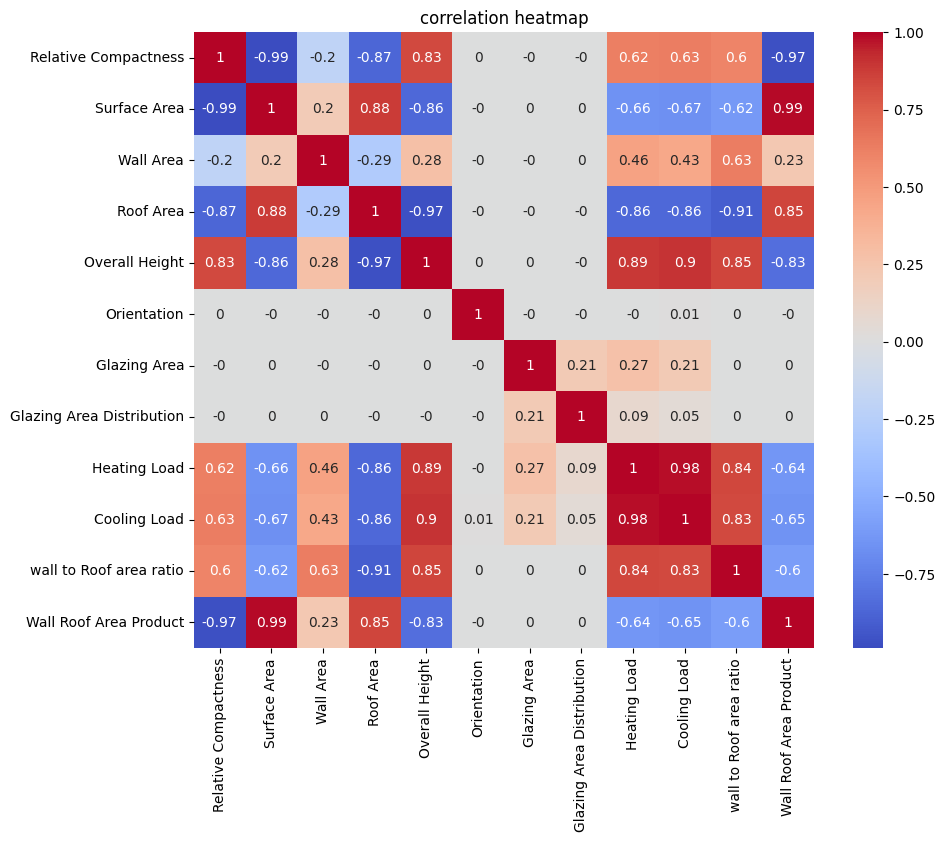

In [73]:
corr = df.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

In [74]:
cat_feature = ['Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Overall Height']
numerical_feature_sc = ['Surface Area', 'Wall Area', 'Roof Area', 'wall to Roof area ratio', 'Wall Roof Area Product']
numerical_feature_mm = ['Relative Compactness']

In [75]:
all_transformations = ColumnTransformer([
    ("ohe", OneHotEncoder(), cat_feature),
    ("sc", StandardScaler(), numerical_feature_sc),
    ("mms",MinMaxScaler(), numerical_feature_mm)
])

In [76]:
lr_pipeline = make_pipeline(all_transformations,
                            LinearRegression())

In [77]:
# Train the model to predict Heating Load
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Orientation',
                                                   'Glazing Area',
                                                   'Glazing Area Distribution',
                                                   'Overall Height']),
                                                 ('sc', StandardScaler(),
                                                  ['Surface Area', 'Wall Area',
                                                   'Roof Area',
                                                   'wall to Roof area ratio',
                                                   'Wall Roof Area Product']),
                                                 ('mms', MinMaxScaler(),
                                                  ['Relative Compactness'])])),
                ('linearregression', LinearRegression())])

In [78]:
y_pred_test = lr_pipeline.predict(X_test)

# Evaluate model performance on the test set using MSE and R² score
lr_mse_h_new = mean_squared_error(y_test, y_pred_test)
lr_r2_h_new = r2_score(y_test, y_pred_test)
print(f'MSE: {lr_mse_h_new:.2f}')
print(f'R2: {lr_r2_h_new:.2f}')


MSE: 7.23
R2: 0.93


In [79]:
# Train the model to predict Cooling Load
lr_pipeline.fit(X_train, y_train_c)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Orientation',
                                                   'Glazing Area',
                                                   'Glazing Area Distribution',
                                                   'Overall Height']),
                                                 ('sc', StandardScaler(),
                                                  ['Surface Area', 'Wall Area',
                                                   'Roof Area',
                                                   'wall to Roof area ratio',
                                                   'Wall Roof Area Product']),
                                                 ('mms', MinMaxScaler(),
                                                  ['Relative Compactness'])])),
                ('linearregression', LinearRegression())])

In [80]:
y_pred_test_c = lr_pipeline.predict(X_test)

# Evaluate model performance on the test set using MSE and R² score
lr_mse_c_new = mean_squared_error(y_test_c, y_pred_test_c)
lr_r2_c_new = r2_score(y_test_c, y_pred_test_c)
print(f'MSE: {lr_mse_c_new:.2f}')
print(f'R2: {lr_r2_c_new:.2f}')

MSE: 9.00
R2: 0.90


# Visualization

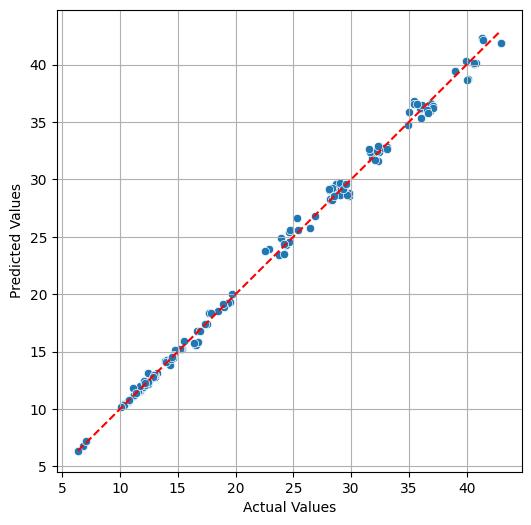

In [81]:
# Heating Load – Actual vs Predicted (Random Forest Regressor)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_h_rf_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

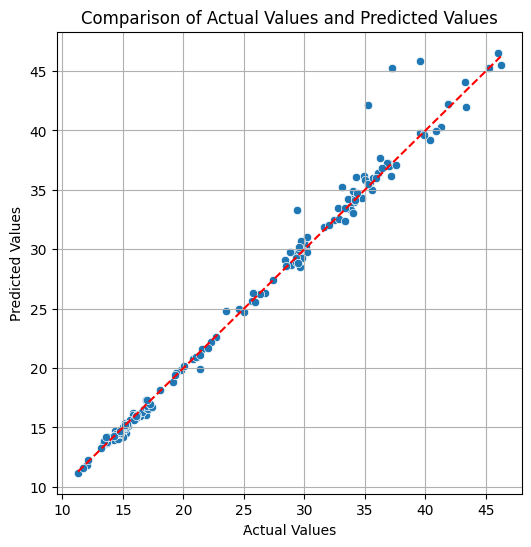

In [82]:
# Cooling Load – Actual vs Predicted (Gradient Boosting Regressor)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_c, y=gbr_predict_test)
plt.plot([y_test_c.min(), y_test_c.max()],
         [y_test_c.min(), y_test_c.max()], 'r--')
plt.grid(True)
plt.xlabel('َActual Values')
plt.ylabel('َPredicted Values')
plt.title('Comparison of Actual Values and Predicted Values')
plt.show()

The scatter plot comparing actual and predicted cooling loads shows that the model performs less accurately at higher values. By examining the distribution of the target variable, it becomes clear that there are fewer samples in the higher range. This data imbalance limits the model's ability to learn patterns in that region, leading to reduced accuracy for high cooling load predictions.

To improve the model’s performance in these areas, one could consider using more advanced models or techniques such as data augmentation or resampling to balance the dataset.



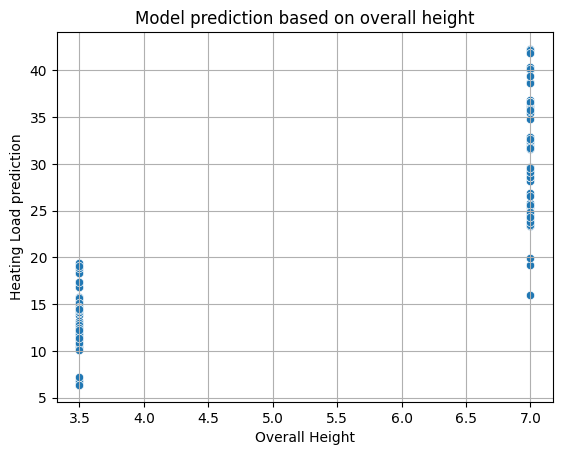

In [111]:
# Predicted Heating load vs. selected input features
sns.scatterplot(x=X_test['Overall Height'], y=y_pred_h_rf_test)
plt.xlabel("Overall Height")
plt.ylabel("Heating Load prediction")
plt.title("Model prediction based on overall height")
plt.grid(True)
plt.show()

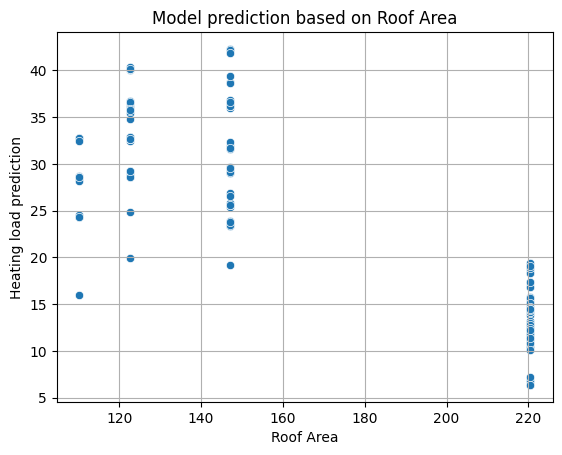

In [112]:
sns.scatterplot(x=X_test['Roof Area'], y=y_pred_h_rf_test)
plt.xlabel('Roof Area')
plt.ylabel('Heating load prediction')
plt.title("Model prediction based on Roof Area")
plt.grid(True)
plt.show()

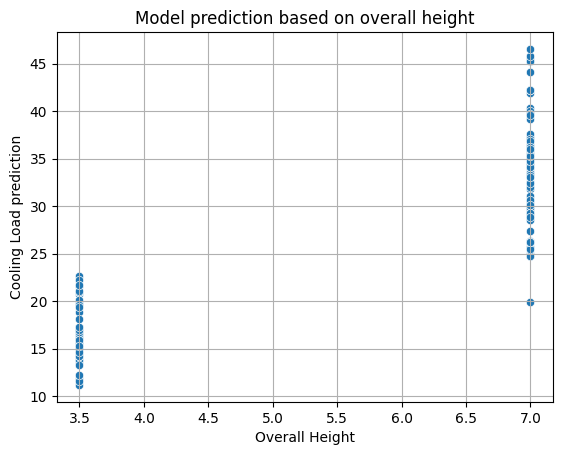

In [83]:
# Predicted Cooling load vs. selected input features
sns.scatterplot(x=X_test['Overall Height'], y=gbr_predict_test)
plt.xlabel("Overall Height")
plt.ylabel("Cooling Load prediction")
plt.title("Model prediction based on overall height")
plt.grid(True)
plt.show()

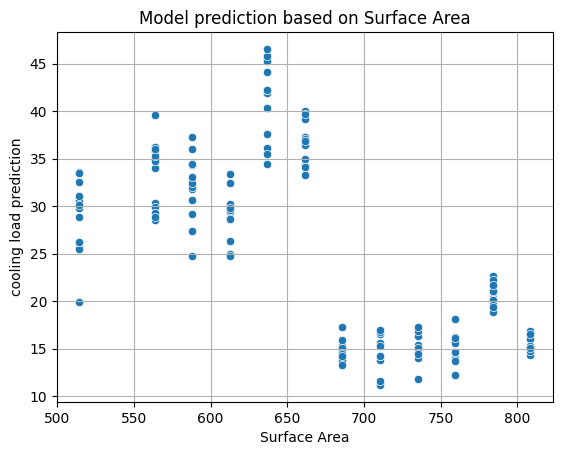

In [84]:
sns.scatterplot(x=X_test['Surface Area'], y=gbr_predict_test)
plt.xlabel('Surface Area')
plt.ylabel('cooling load prediction')
plt.title("Model prediction based on Surface Area")
plt.grid(True)
plt.show()